<a href="https://colab.research.google.com/github/sovank/dsa-with-python/blob/main/Day_46_DSA_Hashing_2_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

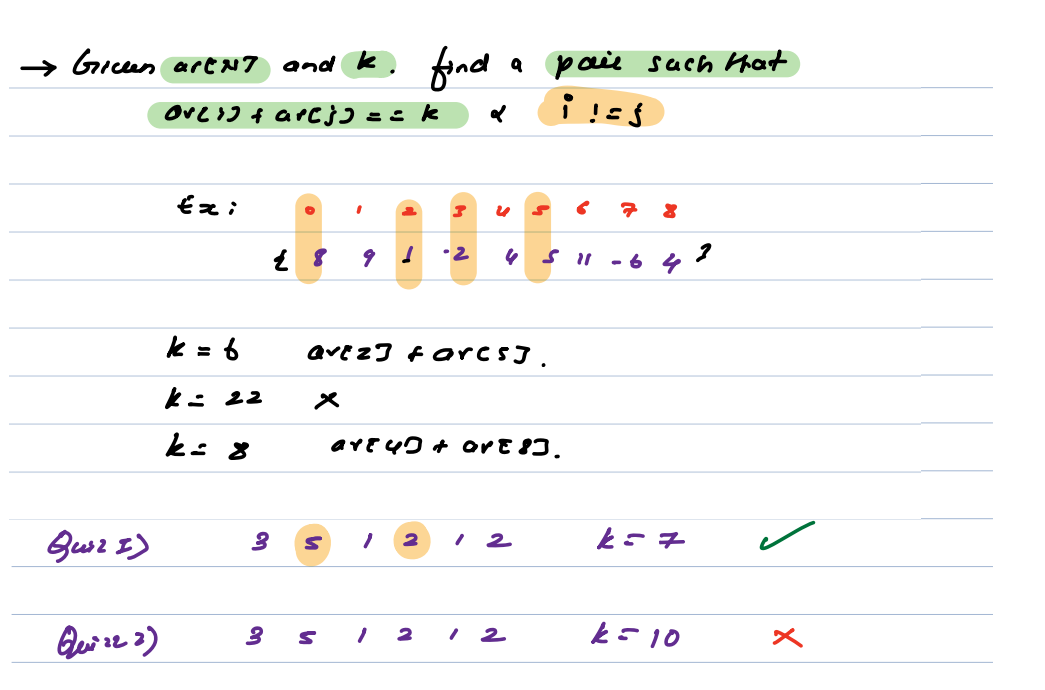

# Brute Force

In [ ]:
# A = [8, 9, 1, -2, 4, 5, 11, -6, 4]
# B = 6

A = [3, 5, 1, 2, 1, 2]
B = 7

for i in range(len(A)):
  for j in range(i+1, len(A)):
    if B - A[i] == A[j]:
      print(A[i], A[j])
      break

# T.C ~ O(N^2)
# S.C ~ O(1)

5 2


# Using Hashset (Set)

In [ ]:
# A = [3, 5, 1, 2, 1, 2]
# B = 7

A = [8, 9, 2, -2, 4, 5, 11, -6, 4]
B = 9

uniqueSet = set()

for i in range(len(A)):
  if B - A[i] in uniqueSet:
    print(A[i], B-A[i])
    break
  else:
    uniqueSet.add(A[i])

# T.C ~ O(N)
# S.C ~ O(1)

5 4




---



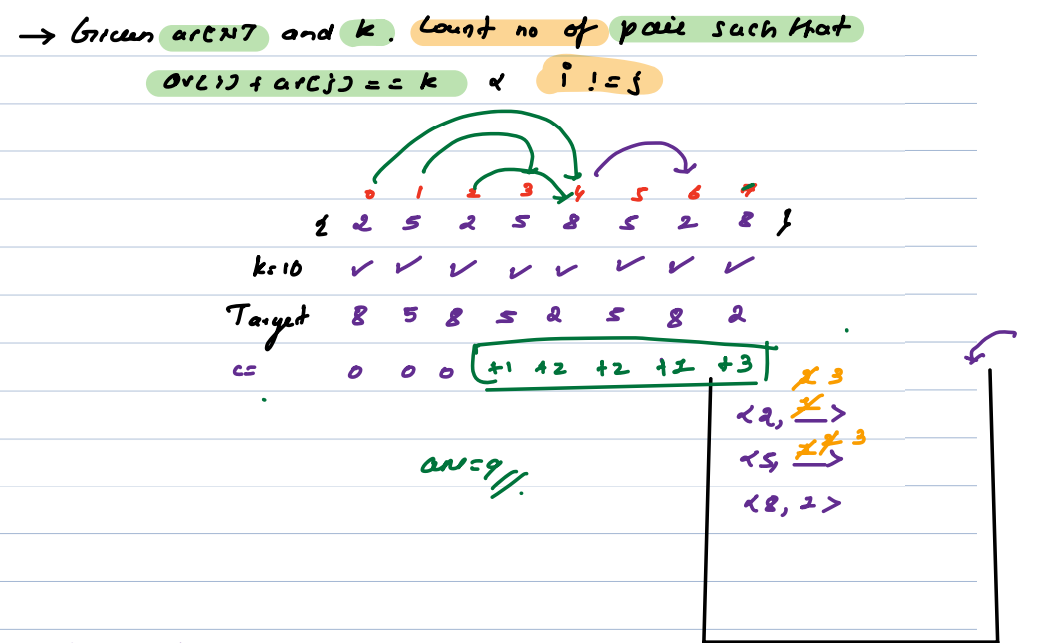

In [ ]:
A = [2, 5, 2, 5, 8, 5, 2, 8]
K = 10
dic = {}
count = 0

for i in range(len(A)):
  if K - A[i] in dic:
    count += dic[K - A[i]]

  if A[i] in dic:
    dic[A[i]] += 1
  else:
    dic[A[i]] = 1

print(count)

# T.C ~ O(N)
# S.C ~ O(1)

9




---



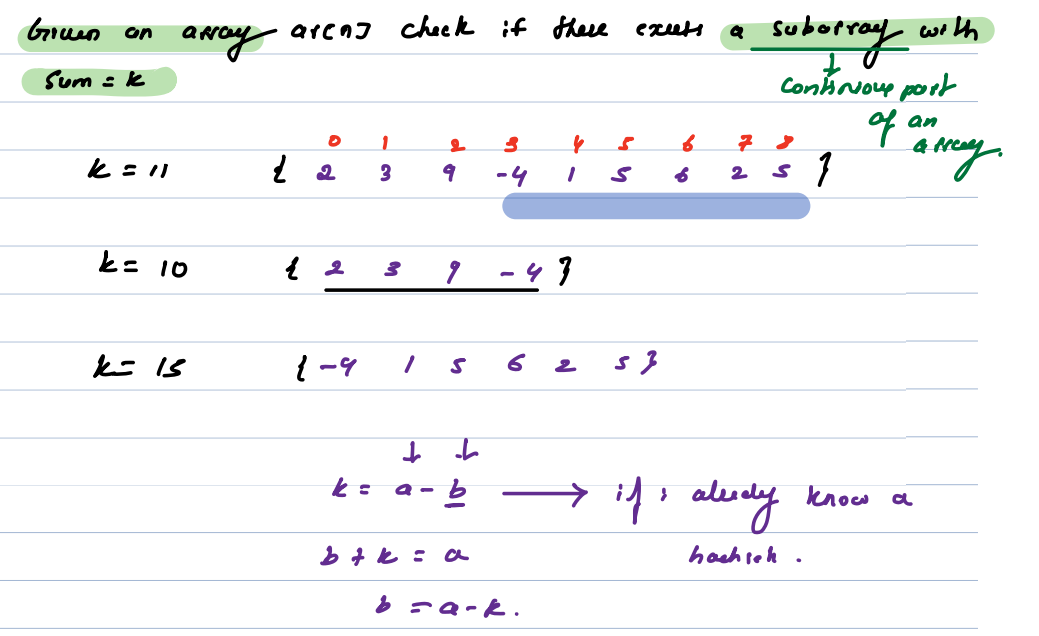

In [ ]:
# A = [2, 3, 9, -4]
# K = 10

A = [-4, 1, 5, 6, 2, 5]
K = 15

pf = [0] * len(A)
pf[0] = A[0]
uniqueSet = set()

uniqueSet.add(0)

for i in range(1, len(A)):
  pf[i] = pf[i-1] + A[i]

# A  = [2, 3, 9, -4]
# pf = [2, 5, 14, 10]
# a - b = k
# b = pf[i] - K
for num in pf:
  if num - K in uniqueSet:
    print("sub-array with sum", K, "is present in Array")
  else:
    uniqueSet.add(num)

sub-array with sum 15 is present in Array




---



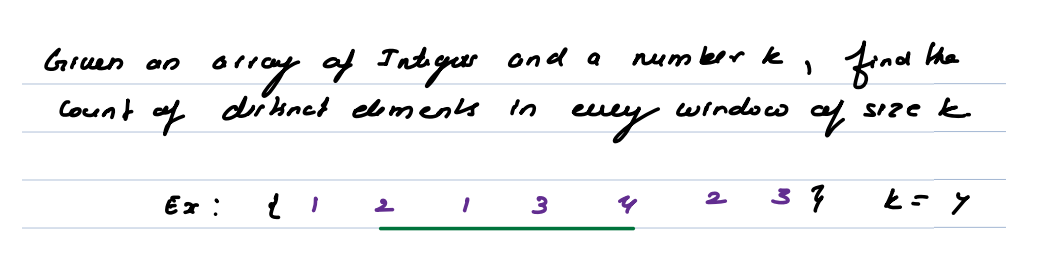

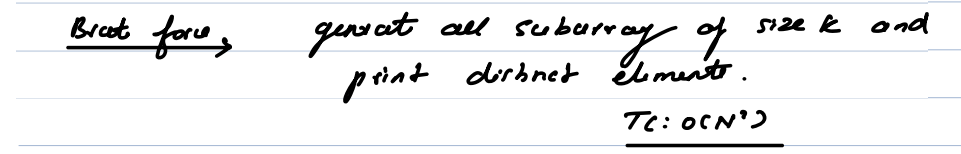



---



# Optimized Code

In [ ]:
A = [1, 2, 1, 3, 4, 2, 3]
k = 4
dic = {}
uniqueElements = []

start = 0
end = k-1

for i in range(start, end+1):
  if A[i] not in dic:
    dic[A[i]] = 1
  else:
    dic[A[i]] += 1

uniqueElements.append(len(dic))

start = 1
end = k

while end < len(A):
  dic[A[start-1]] -= 1
  if dic[A[start-1]] == 0:
    dic.pop(A[start-1])

  if A[end] not in dic:
    dic[A[end]] = 1
  else:
    dic[A[end]] += 1

  uniqueElements.append(len(dic))
  start += 1
  end += 1

uniqueElements

# T.C ~ O(N)
# S.C ~ O(N)

[3, 4, 4, 3]



---



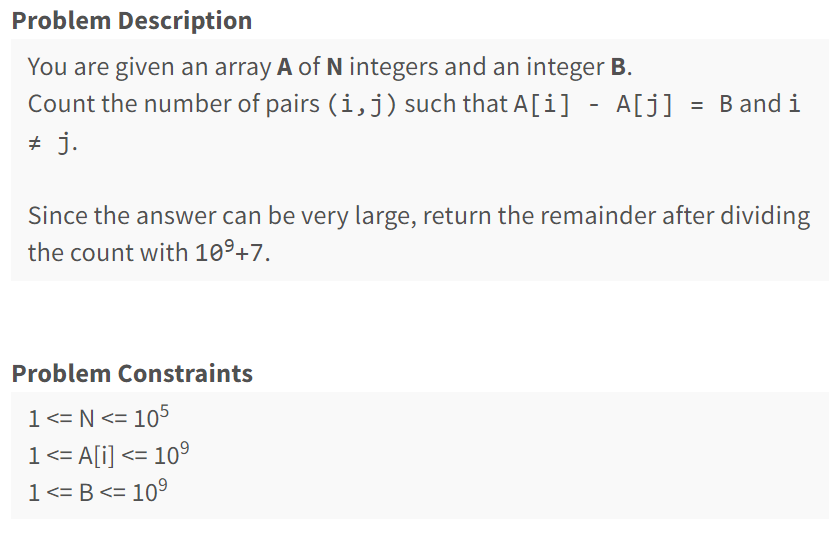

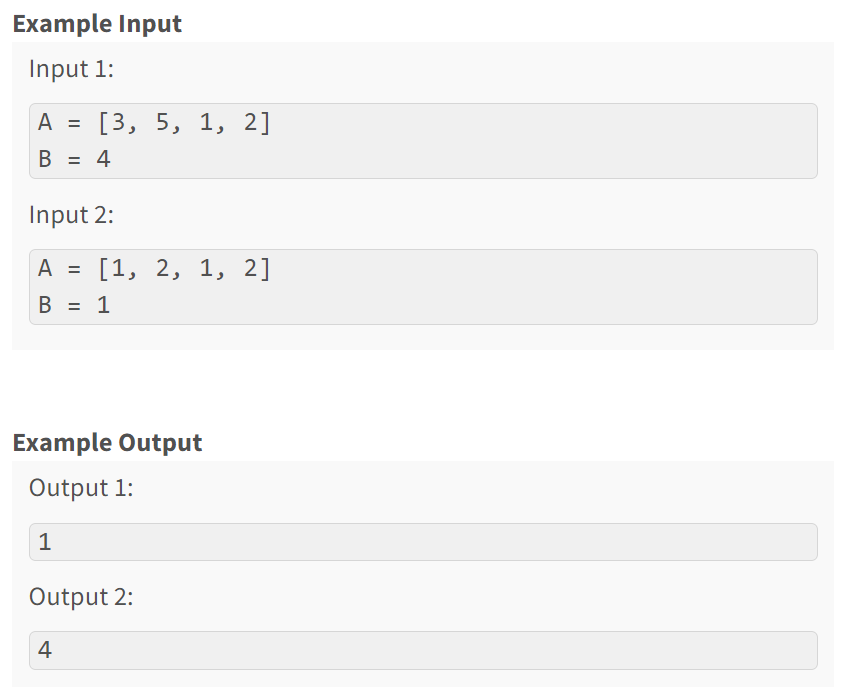

In [ ]:
# A = [3, 5, 1, 2]
# B = 4

A = [1, 2, 1, 2]
B = 1

dic = {}
count = 0

for num in A:
  if num not in dic:
    dic[num] = 1
  else:
    dic[num] += 1

for num in dic:
  if num - B in dic:
    count += dic[num] * dic[num - B]

print(count)

# T.C ~ O(N)
# S.C ~ O(N)

4




---



# Subarray Sum Equals K

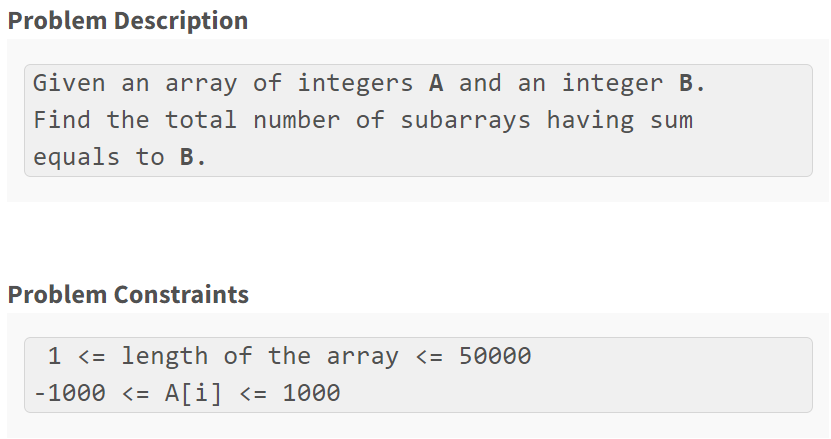

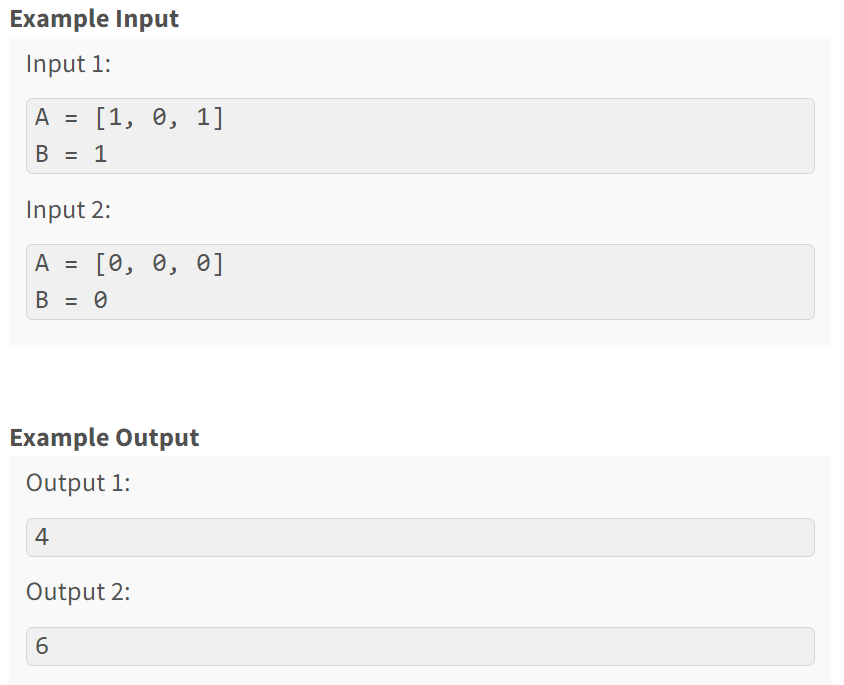

In [ ]:
A = [1, 0, 1]
B = 1
pf = [0] * len(A)
pf[0] = A[0]
uniqueDic = {}
count = 0

for i in range(1, len(A)):
  pf[i] = pf[i-1] + A[i]
# A  = [1, 0, 1]
# pf = [1, 1, 2]

uniqueDic[0] = 1

for i in range(len(pf)):
  if pf[i] - B in uniqueDic:
    count += uniqueDic[pf[i] - B]

  if pf[i] not in uniqueDic:
    uniqueDic[pf[i]] = 1
  else:
    uniqueDic[pf[i]] += 1

print(count)

4




---



# Count Pair Sum

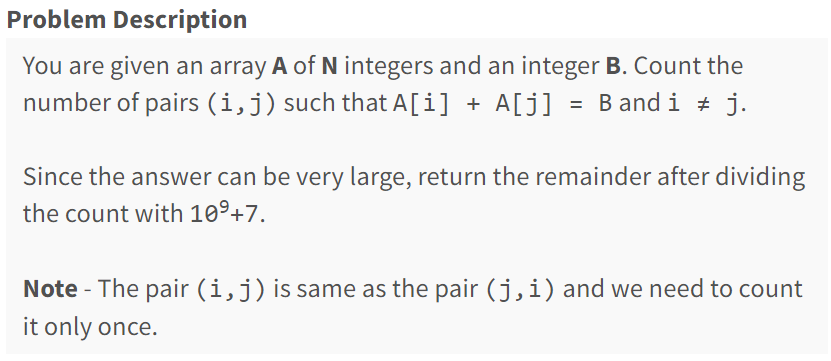

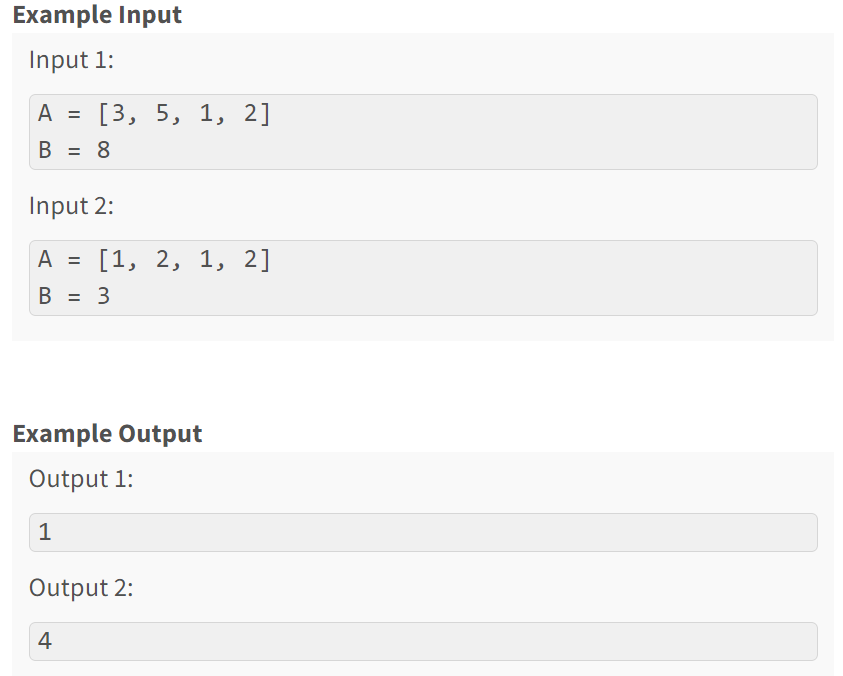

In [ ]:
A = [3, 5, 1, 2]
B = 8

dic = {}
count = 0

for num in A:
  if B - num in dic:
    count += dic[B - num]

  if num in dic:
    dic[num] += 1
  else:
    dic[num] = 1

print(count)

1




---



# Longest Subarray Zero Sum

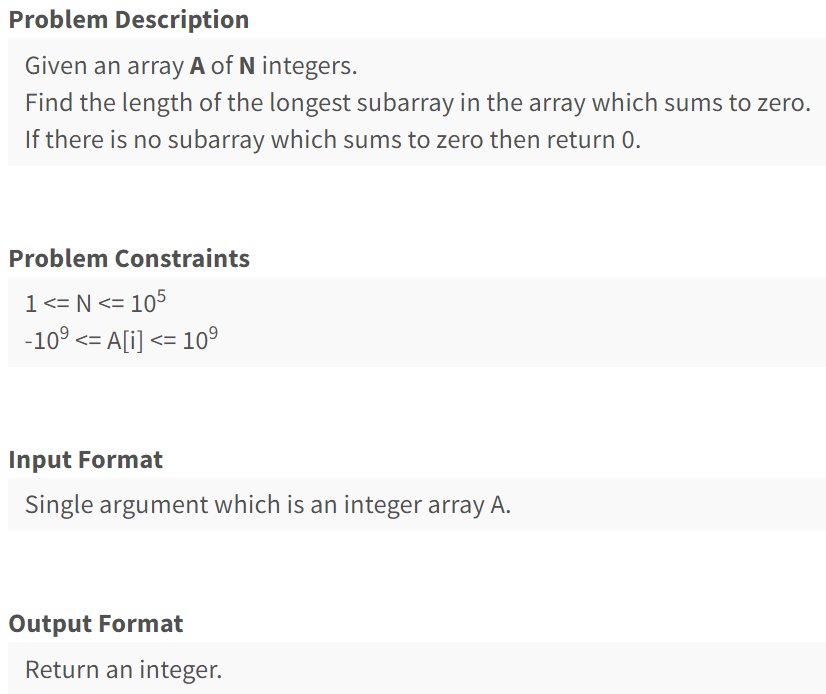

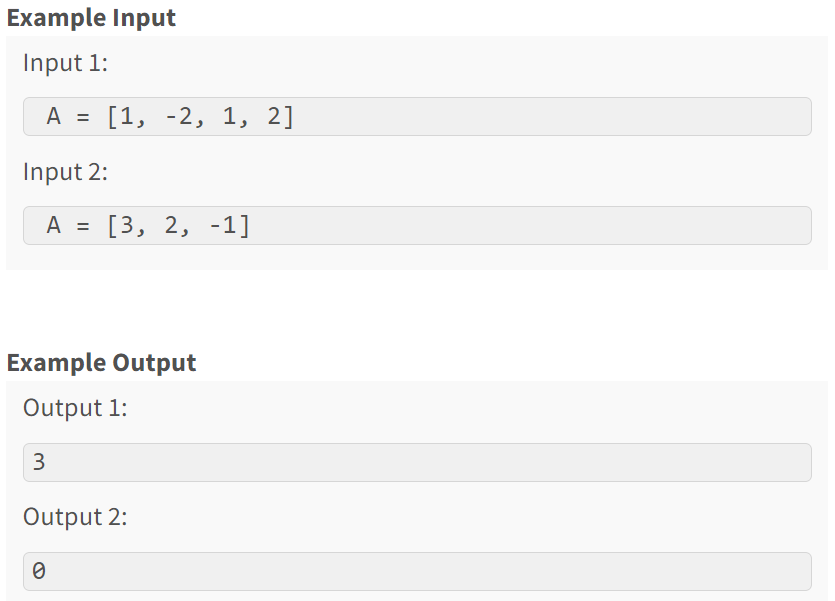

In [5]:
A = [1, -2, 1, 2]
A = [3, -1, -1, 2]

pf = [0] * len(A)
pfsum_map = {}
max_length = 0
pf[0] = A[0]

for i in range(1, len(A)):
  pf[i] = pf[i-1] + A[i]

# A  = [1, -2, 1, 2]
# pf = [1, -1, 0, 2]

# A  = [3, -1, -1, 2]
# pf = [3,  2,  1, 3]

for i in range(len(A)):
  if pf[i] == 0:
    max_length = i + 1

  if pf[i] in pfsum_map:
    max_length = max(max_length, i - pfsum_map[pf[i]]) # check line number 16 --> this gives the length of subarray (substracting 3rd index - 0th index) = 3 --> [-1, -1, 2] = 0
  else:
    pfsum_map[pf[i]] = i

print(max_length)

3




---



# Subarray with given sum

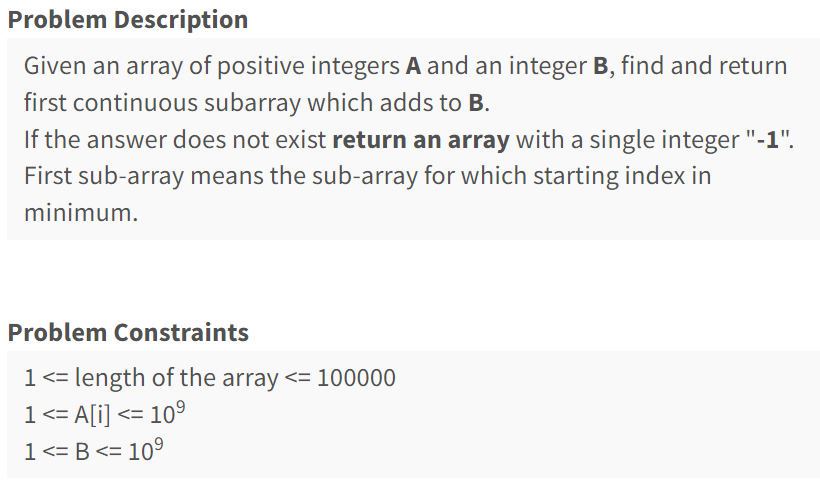

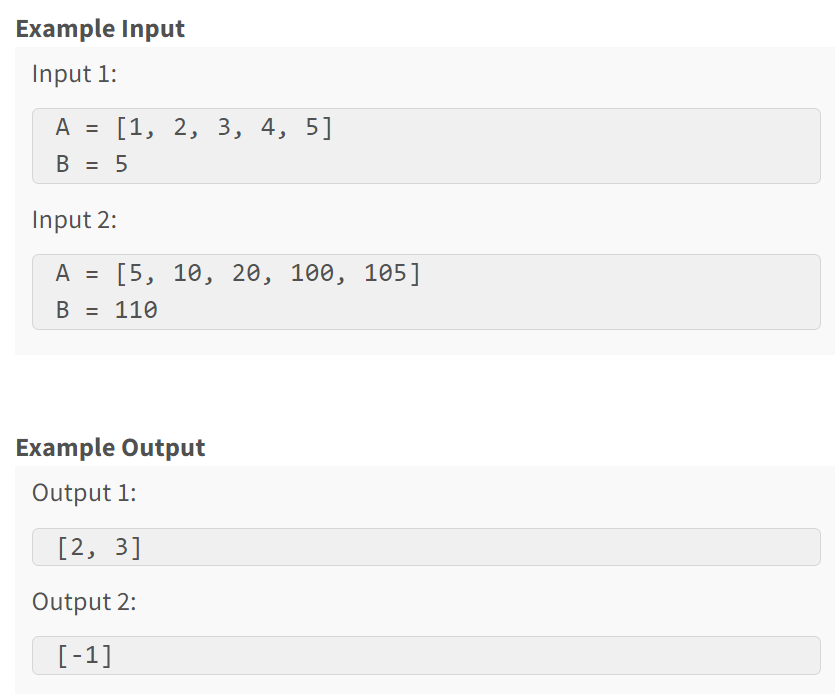

In [8]:
def subarray_with_given_sum(A, B):
  n = len(A)
  i = j = 0
  ans = []
  summ = A[0]
  flag = False

  while j < n and i < n:
      if summ == B:           # this handles the case when summ == B
          flag = True
          break

      elif summ < B:          # this handles the case when summ < B --> increase j but also take care j+1 should not be array length
          if j+1 == n:
              break
          j += 1
          summ += A[j]
      else:                   # this handles the case when summ > B --> dec value first then increase i but also take care i+1 should not be array length
          if i + 1 == n:
              break
          summ -= A[i]
          i += 1

  if flag == False:
      return [-1]

  for k in range(i, j+1):
      ans.append(A[k])         # print all the values from i to j

  return ans

A = [1, 2, 3, 4, 5]
B = 5
subarray_with_given_sum(A, B)

[2, 3]